In [4]:
def get_last_continuous_sequence(numbers):
    if not numbers:
        return []

    sequences = []
    current_seq = [numbers[0]]

    for i in range(1, len(numbers)):
        if numbers[i] == numbers[i - 1] + 1:
            current_seq.append(numbers[i])
        else:
            sequences.append(current_seq)
            current_seq = [numbers[i]]

    sequences.append(current_seq)  # append the last sequence
    print(sequences)

    return sequences[-1]

get_last_continuous_sequence([1, 2, 3, 5, 6, 7, 8, 9, 10])

[[1, 2, 3], [5, 6, 7, 8, 9, 10]]


[5, 6, 7, 8, 9, 10]

In [ ]:
{'text': '84 yr old c dissecting aortic aneurysm .\n\nsr c blocked beats .bp labile ranging 160 to 77 systolic.labetolol drip for short time .to have mri this pm. k, mg repleted .milrinone continues on .375.amniodarone dc iv .patient feels nauseous when bp under 110\n\nbs diminished ,7.38/32/115/20 on 6lnp\n\ntaking cl liquids,pos bs ,no stool\n\nhuo 10 to 20,creat\n\npatient restless.co low back pain some releif c tylenol and sitting on side of bed .\n\nlabile bp unexplained ,need mri to check aneurysm\n\nfollow hct,lytes\naim bp 110 to 120\nmri this pm\n\naim bp 110 to 120 sys\n\n', 'event': ['Pain', 'Excretion', 'Eating', 'Pain'], 'event_id': ['e1', 'e2', 'e3', 'e4'], 'phrase': '', 'raw_output': '{\n  "events": [\n    {\n      "event_id": "e1",\n      "event_type": "Pain",\n      "text_quote": "co low back pain some releif c tylenol and sitting on side of bed",\n      "attributes": {\n        "severity": "Unknown",\n        "location": "low back",\n        "duration": "Unknown",\n        "time": "Unknown",\n        "caused_by": "Unknown"\n      }\n    },\n    {\n      "event_id": "e2",\n      "event_type": "Excretion",\n      "text_quote": "taking cl liquids,pos bs ,no stool",\n      "attributes": {\n        "type": "stool",\n        "quality": "none",\n        "frequency": "Unknown",\n        "negation": "false",\n        "time": "Unknown",\n        "caused_by": "Unknown"\n      }\n    },\n    {\n      "event_id": "e3",\n      "event_type": "Eating",\n      "text_quote": "taking cl liquids,pos bs ,no stool",\n      "attributes": {\n        "food": "liquids",\n        "amount": "Unknown",\n        "method": "Unknown",\n        "negation": "false",\n        "time": "Unknown",\n        "caused_by": "Unknown"\n      }\n    },\n    {\n      "event_id": "e4",\n      "event_type": "Pain",\n      "text_quote": "patient feels nauseous when bp under 110",\n      "attributes": {\n        "severity": "Unknown",\n        "location": "Unknown",\n        "duration": "Unknown",\n        "time": "when bp under 110",\n        "caused_by": "low blood pressure"\n      }\n    }\n  ],\n  "order": []\n}', 'attributes': [{'Pain': {'severity': 'Unknown', 'location': 'low back', 'duration': 'Unknown', 'time': 'Unknown', 'caused_by': 'Unknown'}}, {'Excretion': {'type': 'stool', 'quality': 'none', 'frequency': 'Unknown', 'negation': 'false', 'time': 'Unknown', 'caused_by': 'Unknown'}}, {'Eating': {'food': 'liquids', 'amount': 'Unknown', 'method': 'Unknown', 'negation': 'false', 'time': 'Unknown', 'caused_by': 'Unknown'}}, {'Pain': {'severity': 'Unknown', 'location': 'Unknown', 'duration': 'Unknown', 'time': 'when bp under 110', 'caused_by': 'low blood pressure'}}], 'orders': [[]], 'text_quotes': ['co low back pain some releif c tylenol and sitting on side of bed', 'taking cl liquids,pos bs ,no stool', 'taking cl liquids,pos bs ,no stool', 'patient feels nauseous when bp under 110'], 'event_time': ['Unknown', 'Unknown', 'Unknown', 'Unknown'], 'negation': ['Unknown', 'Unknown', 'Unknown', 'Unknown'], 'caused_by': ['Unknown', 'Unknown', 'Unknown', 'Unknown'], 'event_name_prompt': 'Given the text: 84 yr old c dissecting aortic aneurysm .\n\nsr c blocked beats .bp labile ranging 160 to 77 systolic.labetolol drip for short time .to have mri this pm. k, mg repleted .milrinone continues on .375.amniodarone dc iv .patient feels nauseous when bp under 110\n\nbs diminished ,7.38/32/115/20 on 6lnp\n\ntaking cl liquids,pos bs ,no stool\n\nhuo 10 to 20,creat\n\npatient restless.co low back pain some releif c tylenol and sitting on side of bed .\n\nlabile bp unexplained ,need mri to check aneurysm\n\nfollow hct,lytes\naim bp 110 to 120\nmri this pm\n\naim bp 110 to 120 sys\n\n, \n                                and the following event types with their definitions: Eating : The patient takes food into their body by mouth. Identifed Always\nExcretion : The patient discharges waste matter from their body. Identifed Always\nFamily : The patient has a visit, call, or communication with a family member.\nPain : The patient reports or shows signs of pain. Identifed Always\nSleep : The patient sleeps or the sleep’s quality or quantity is described. Identifed Always.\nUnknown : choose "Unknown" if none of the other event type are applicable. \n                                ---\n                                Your task:\n                                0. Identify ALL events in the text (zero, one, or more).\n1. For each event, assign an event_type from the list above.\n2. If multiple event of same type is mentioned, assign the event_type multiple times\n3. Extract attributes for each event using ONLY the allowed attributes listed below.\n4. Use keyword evidence (Ki) ONLY if it is consistent with the text context.\n5. Output strictly valid JSON following the schema below.\n                                ---\n                                Classification Rules:\n                                - A text may contain multiple events, either of the same type or of different types.\n- Create a separate event object for each event mention.\n- Do not extract events that are explicitly NEGATED (e.g., "denies pain", "couldn\'t sleep") unless the event is marked as "Identifed Always".\n- If a NEGATED event is marked as Identified Always, extract it and set the negation attribute to true.\n- Ignore events that refer to FUTURE or HYPOTHETICAL scenarios (e.g., "will eat tomorrow").\n- A valid event must have occurred in the recent past or be occurring at the time of writing.\n- If no events are found, or if uncertain, return: {"events": []}\n                                None\n                                ---\n        Keyword evidence (Ki):\n        Additional facts: A keyword matching algorithm without context detected keyword(s) (\'pain\',).\n        Use this only as a pointer. If context contradicts, ignore.\n                                ---\n                                Output Schema (strict):\n                                {\n                                "events": [\n                                    {\n                                    "event_id": "&lt; A unique id eg.: e1 | e2 |...&gt;"\n                                    "event_type": "&lt;Pain | Sleep | Excretion | Eating | Family | Unknown&gt;",\n                                    "text_quote": "&lt;fragement from the text indicating the event_type&gt;",\n                        "attributes": {\n                            "&lt;attribute_name&gt;": "&lt;attribute_value&gt;"\n                        }\n                                    }\n                                ],\n                                "order": [\n                                    ["e1", "before" | "after" | "simultaneous", "e2" ]\n                                ]\n                                }\n                                \n                    Rules:\n                        - Ensure the output is valid JSON (parseable).\n                        - "eventS" must always be an array (can be empty).\n                        - Multiple instances of the same event type appear with different ids.\n                        - Events appear in the array in the same order in which they appear in the text.\n                        - Their partial orders can be expressed using the "order" section.\n                        - Do not include extra keys, comments, or text.\n                        - Each object in "events" must contain "event_type", "text_quote", and "attributes".\n                        - If an event attribute type has no value mentioned, return "attributes": {"&lt; attribute name &gt;:Unknown"} for each attribute type defined for the event type \n                \n                                \n                ---\n                Examples:\n                \n                text: "Patient ate breakfast this morning. He seems less anxious."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Eating",\n                    "text_quote":"Patient ate breakfast this morning",\n                    "attributes": {"food": "breakfast", \n                                   "amount": "Unknown",\n                                   "method": "Unknown",\n                                   "negation": "false",\n                                   "time":"morning",\n                                   "caused_by":"Unknown"}\n                    }\n                ],\n                "order":[]\n                }\n                \n                text: "Patient reported severe abdominal pain."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Pain",\n                    "text_quote": "severe abdominal Pain",\n                    "attributes": {"severity": "severe", \n                                   "location": "abdominal",\n                                   "duration": "Unknown",\n                                   "negation": "false",\n                                   "time":"Unknown",\n                                   "caused_by":"Unknown"}\n                    }\n                ],\n                "order":[]\n                }\n                \n                text: "Patient called his son around 3 pm."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Family",\n                    "text_quote": "called his son around 3 pm",\n                    "attributes": {"interaction": "call", \n                                    "relation": "son",\n                                    "negation": "false",\n                                    "time":"3 pm",\n                                    "caused_by":"Unknown"}\n                    }\n                ],\n                "order":[]\n                }\n                \n                text: "Patient had a loose stool overnight."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Excretion",\n                    "text_quote": "loose stool overnight",\n                    "attributes": {"type": "stool", \n                                   "quality": "loose", \n                                   "frequency":"overnight", \n                                   "negation": "false",\n                                   "time":"night",\n                                   "caused_by":"Unknown"}\n                    }\n                ],\n                "order":[]\n                }\n                \n                text: "Patient was able to sleep well last night."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Sleep",\n                    "text_quote": "sleep well last night",\n                    "attributes": {"quality": "well",\n                                    "duration": "Unknown", \n                                    "negation": "false",\n                                    "time":"night",\n                                    "caused_by":"Unknown"}\n                    }\n                ],\n                "order":[]\n                }\n                \n                text: "The patient couldn\'t sleep due to severe pain."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Sleep",\n                    "text_quote": "couldn\'t sleep",\n                    "attributes": {"quality": "poor", \n                                    "duration": "Unknown",\n                                    "negation": "true",\n                                    "time":"Unknown",\n                                    "caused_by":"Pain"}\n                    },\n                    {"event_id": "e2",\n                    "event_type": "Pain",\n                    "text_quote": "severe pain",\n                    "attributes": {"severity": "severe", \n                                    "location": "Unknown", \n                                    "duration": "Unknown", \n                                    "time":"Unknown",\n                                    "caused_by":"Unknown"}\n                    }\n                ],\n                "order":["e1", "after", "e2"]\n                }\n                \n                text: "The patient complained of severe back pain, was given Tylenol, but the pain persisted and he was then prescribed stronger morphine."\n                output: {\n                "events": [\n                    {"event_id": "e1",\n                    "event_type": "Pain",\n                    "text_quote": "complained of severe back pain",\n                    "attributes": {"severity": "severe", \n                                    "location": "back",\n                                    "duration": "Unknown", \n                                    "time":"Unknown",\n                                    "caused_by":"Unknown"}\n                    },\n                    {"event_id": "e2",\n                    "event_type": "Pain",\n                    "text_quote": "pain persisted",\n                    "attributes": {"severity": "severe", \n                                   "location": "back",\n                                   "duration": "persistent", \n                                   "time":"after Tylenol",\n                                   "caused_by":"Unknown"}\n                    }\n                ],\n                "order":[["e1", "before", "e2"]]\n                }\n                \n                                ', 'event_detection_time': 367.50314643606544}

In [ ]:
def get_classification_results():
    classification_rules = []
    classification_rules.append("- A text may contain multiple events, either of the same type or of different types.")
    classification_rules.append("- Create a separate event object for each event mention.")
    classification_rules.append("- Do not extract events that are explicitly negated (e.g., \"denies pain\", \"couldn\'t sleep\") unless the event is marked as \"Identifed Always\".")
    if True:
        classification_rules.append("- If a negated event is marked as Identified Always, extract it and set the negation attribute to true.")
    classification_rules.append("- Ignore events that refer to future or hypothetical scenarios (e.g., \"will eat tomorrow\").")
    classification_rules.append("- A valid event must have occurred in the recent past or be occurring at the time of writing.")
    classification_rules.append("- If no events are found, or if uncertain, return: {\"events\": []}")
    classification_rules = "\n".join(classification_rules)
    return classification_rules

print(get_classification_results())

- A text may contain multiple events, either of the same type or of different types.
- Create a separate event object for each event mention.
- Do not extract events that are explicitly negated (e.g., "denies pain", "couldn't sleep") unless the event is marked as "Identifed Always".
- If a negated event is marked as Identified Always, extract it and set the negation attribute to true.
- Ignore events that refer to future or hypothetical scenarios (e.g., "will eat tomorrow").
- A valid event must have occurred in the recent past or be occurring at the time of writing.
- If no events are found, or if uncertain, return: {"events": []}


In [41]:
import pandas as pd
def combine_lists(x):
    combined = []
    for item in x:
        if item:
            if isinstance(item, (list, tuple)):
                combined.extend(item)
            else:
                combined.append(item)
    combined = [i for i in combined if i]
    res = set(combined)
    return list(res)
df = pd.read_pickle("/home/asusaiyah/tactics_storage/projects/llm_text_to_event/exports/04_groundtruth/P-SET/Generated/Sleep_Documents.pkl")
rdf = df.groupby('ROW_ID')[["Event_Name","Keyword","Document"]].agg(lambda x:combine_lists(x)).reset_index()
rdf['Document'] = [' '.join(i) for i in rdf['Document']]
len(rdf), rdf

(202,
       ROW_ID                                 Event_Name  \
 0    1310477                    [Family, Pain, Unknown]   
 1    1310478                    [Family, Pain, Unknown]   
 2    1310479             [Sleep, Family, Pain, Unknown]   
 3    1310480                     [Sleep, Unknown, Pain]   
 4    1310481                            [Unknown, Pain]   
 ..       ...                                        ...   
 197  1671536                [Sleep, Unknown, Excretion]   
 198  1671537                [Sleep, Unknown, Excretion]   
 199  1671538  [Sleep, Unknown, Family, Pain, Excretion]   
 200  1671539                    [Family, Unknown, Pain]   
 201  1671540                            [Pain, Unknown]   
 
                                                Keyword  \
 0                                          [pain, son]   
 1                             [daughter, family, pain]   
 2    [daughter, sleeping, son, distress, pain, asleep]   
 3                                  

In [39]:
df.groupby('UID')[["Event_Name","Keyword","Document"]].agg(lambda x:combine_lists(x)).reset_index()

,UID,Event_Name,Keyword,Document
0,14995_1457369_0000,[Unknown],[],[ccu nsg note: alt in cv/cardiomyopathy\nsee a...
1,14995_1457369_0001,[Unknown],[],[ccu nsg note: alt in cv/cardiomyopathy\nsee a...
2,14995_1457369_0002,[Unknown],[],[ccu nsg note: alt in cv/cardiomyopathy\nsee a...
3,14995_1457369_0003,[Unknown],[],[ccu nsg note: alt in cv/cardiomyopathy\nsee a...
4,14995_1457369_0004,[Unknown],[],[ccu nsg note: alt in cv/cardiomyopathy\nsee a...
...,...,...,...,...
4754,7042_1356124_0013,[Unknown],[],[nursing progress notes\n please see carevue ...
4755,7042_1356124_0014,[Unknown],[],[nursing progress notes\n please see carevue ...
4756,7042_1356124_0015,[Unknown],[],[nursing progress notes\n please see carevue ...
4757,7042_1356124_0016,[Unknown],[],[nursing progress notes\n please see carevue ...


In [36]:
rdf.Event_Name.value_counts()

Event_Name
[Unknown]                  4289
[Pain]                      139
[Sleep]                     133
[Family]                    101
[Excretion]                  62
[Eating]                     19
[Sleep, Pain]                 7
[Sleep, Family]               5
[Family, Pain]                2
[Sleep, Family, Eating]       1
[Sleep, Family, Pain]         1
Name: count, dtype: int64

In [ ]:
import pandas as pd
df1 = pd.read_pickle("../exports/04_groundtruth/P-SET/Generated/Sleep_Sentences.pkl")
# df2 = pd.read_pickle("../exports/04_groundtruth/P-SET/Annotating/Sleep_Sentences_old.pkl")
df1['Sent_gt_Sleep'] = None
df1['negation'] = False
df1['good_example'] = False
for anno in ["Sent_gt_Sleep" , "negation", "good_example"]:
    UID_2_anno = df2.groupby("Sentence")[anno].first().to_dict()
    df1[anno] = df1['Sentence'].map(UID_2_anno)
df1.to_pickle("../exports/04_groundtruth/P-SET/Annotating/Sleep_Sentences.pkl")

In [21]:
from glob import glob
import os,sys
import pandas as pd
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)


focus = "Doc"
if focus == "Doc":
    uid = "ROW_ID"
elif focus == "Sent":
    uid = "UID"
files = glob(f"../exports/06_analysis/Sleep/*_Event_Name_LLM_Events_all_evidence_{focus}_Sleep.xlsx")
full_df = []
for file in files:
    file_name = os.path.basename(file)
    df = pd.read_excel(file)
    if file_name[:2] == "FP":
        sample_per = 0.6
    else:
        sample_per = 0.2
    N = len(df)
    subN = int(sample_per*N)
    finalN= max(1,subN)
    print(file_name, finalN)
    df_samples = df.sample(n=finalN,replace=False)
    full_df.append(df_samples)
full_df = pd.concat(full_df).reset_index()
full_df[uid].tolist()
    

TN_Event_Name_LLM_Events_all_evidence_Doc_Sleep.xlsx 4
FP_Event_Name_LLM_Events_all_evidence_Doc_Sleep.xlsx 23
FN_Event_Name_LLM_Events_all_evidence_Doc_Sleep.xlsx 1
TP_Event_Name_LLM_Events_all_evidence_Doc_Sleep.xlsx 7


[1468987,
 1468980,
 1356120,
 1356115,
 1356117,
 1468992,
 1356124,
 1468964,
 1468994,
 1477464,
 1356116,
 1310488,
 1477465,
 1468984,
 1477461,
 1468996,
 1310483,
 1468979,
 1477467,
 1468998,
 1468986,
 1468993,
 1325555,
 1477473,
 1468974,
 1457371,
 1468972,
 1457381,
 1477470,
 1468981,
 1325552,
 1356122,
 1457375,
 1356118,
 1310490]

<Axes: >

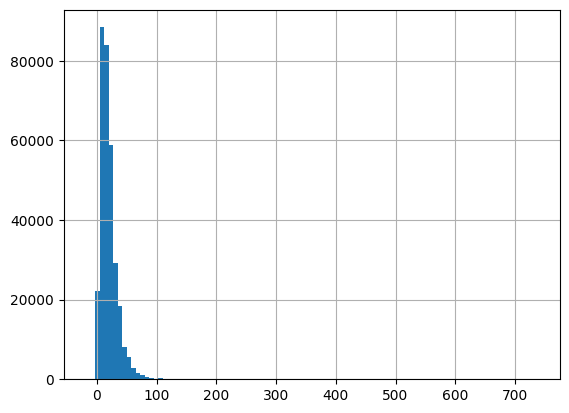

In [18]:
import pandas as pd
id_type = "UID"
df_date=pd.read_pickle("../exports/04_dictionary_features.pkl")
df_date['CHARTTIME'] = pd.to_datetime(df_date['CHARTTIME'])
df_date['STORETIME'] = pd.to_datetime(df_date['STORETIME'])
df_date['TIME_DIFF'] = df_date['STORETIME'] - df_date['CHARTTIME']
df_date['TIME_DIFF_min'] = df_date['TIME_DIFF'].dt.total_seconds() / 60
df_date['TIME_DIFF_min'].hist(bins=100)
# df_date[id_type] = df_date[id_type].astype(str)
# from datetime import datetime
# id2starttime = df_date.groupby(id_type)['CHARTTIME'].min().to_dict()
# id2starttime = { k: datetime.strptime(v, '%Y-%m-%d %H:%M:%S') for k, v in id2starttime.items()}
# id2endtime = df_date.groupby(id_type)['STORETIME'].max().to_dict()
# id2endtime = { k: datetime.strptime(v, '%Y-%m-%d %H:%M:%S') for k, v in id2endtime.items()}

# id2starttime, id2endtime

In [25]:
str(df_date["STORETIME"].iloc[0])

'2139-07-13 10:20:01'

In [ ]:
import pandas as pd
df = pd.read_pickle("../exports/04b_groundtruth/P-SET/Annotating/Sleep_Sentences.pkl")
df.loc[df.comment=='nan','negation'] = False
df.loc[df.comment=='nan','good_example'] = False
df.loc[df.comment=='nan','comment'] = ''
df.comment.value_counts(dropna=False)
df.to_pickle("../exports/04b_groundtruth/P-SET/Annotating/Sleep_Sentences_2.pkl")

In [6]:
import pandas as pd
df = pd.read_excel("../exports/05b_llm_llama3.1:70b_P-SET_v2/Sleep/Sleep_Sentences_att_True.xlsx")
df['Event_Name_LLM_Events_example_evidence_Sent'].value_counts(dropna=False)

Event_Name_LLM_Events_example_evidence_Sent
NaN    600
Name: count, dtype: int64